In [1]:
import pandas as pd
import numpy as np

In [35]:
new_df = pd.read_csv("began_group_post.csv")

In [30]:
new_df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
2,111650344,77cbb1df31b4da9fb17a180aea1d23136db4fe31f10870...,2018-12-06,19000.0,32000,2021-04-12,2023-04-11,0
3,111650344,14cb36a801887d044ae656d130332ca0738e7221437fff...,2018-12-06,21956.0,32000,2021-04-12,2023-04-11,0
4,111650344,73fcfb6e42003be3851d890348dfbbec6394798b9c8d2c...,2018-12-06,26006.0,32000,2021-04-12,2023-04-11,0
...,...,...,...,...,...,...,...,...
1374728,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374729,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374730,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374731,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1


## 3. Relative time model

1) relative_time 추가

In [36]:
# relative_time 추가
new_df['STND_YMD'] = pd.to_datetime(new_df['STND_YMD'], errors='coerce')
new_df['vgn_bgn_dttm'] = pd.to_datetime(new_df['vgn_bgn_dttm'], errors='coerce')
new_df['vgn_end_dttm'] = pd.to_datetime(new_df['vgn_end_dttm'], errors='coerce')
new_df["NET_PRD_SAL_AMT"] = new_df["NET_PRD_SAL_AMT"].apply(lambda x : np.log(x+1))

new_df["relative_time"] = new_df["STND_YMD"] - new_df["vgn_bgn_dttm"]
new_df["relative_time"] = new_df["relative_time"].dt.days
relat_df = new_df[(new_df["relative_time"] <= 30) & (new_df["relative_time"] >= -30)].reset_index(drop=True)
relat_df

# 1323258 행 삭제: -30일에서 30일 사이에 있는 경우가 아니면 다 삭제돼서 많이 줄어들었음

# 종속변수: NET_PRD_SAL_AMT (SAL_UTPR)

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post,relative_time
0,110651228,3a54698e557b9b56a87bb3b5a4b9f5d16082fc72822aa7...,2021-04-06,9.259226,15000,2021-05-06,2023-05-05,0,-30
1,110651228,f61541ca5d40e0f3f9da850fd46a6999e5b962d190b1be...,2021-04-06,9.615872,15000,2021-05-06,2023-05-05,0,-30
2,110651228,99524e1195569a43d7f5b12c48c60863a3e43052558318...,2021-04-07,9.615872,15000,2021-05-06,2023-05-05,0,-29
3,110651228,8da0a3ec421c831c860e4df9757992d56e005774601f7e...,2021-04-11,9.392745,15000,2021-05-06,2023-05-05,0,-25
4,110651228,20ebae6c6d5ffb212e0c4229159e29f246a35b09377115...,2021-04-16,9.392745,15000,2021-05-06,2023-05-05,0,-20
...,...,...,...,...,...,...,...,...,...
51470,111292119,491eeb5c00b47cde8e1c9fc263c9e546d12a6762af9766...,2022-07-24,8.999125,9900,2022-06-24,2023-06-23,1,30
51471,111292119,f61a4578cfbc2caf1e1f056f5e48c570a356bf0c579697...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30
51472,111292119,90d932e9d8336254e0b704acfe608cab98073917fe1070...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30
51473,111292119,89867ddf7d55bdd5bea1dae66f04ec280e081f8e33513e...,2022-07-24,9.050289,9900,2022-06-24,2023-06-23,1,30


In [37]:
# 비선형관계 보기 위해서 
rt = pd.get_dummies(relat_df["relative_time"]).astype(int)
relat_df = pd.concat([relat_df, rt], axis=1)
del relat_df[-1]

2) FE 추가

In [38]:
# FE : 제품단위, 날짜단위
def demean(df, column, group):
    return df[column] - df.groupby(group)[column].transform('mean')

relat_df["y_demeaned"] = demean(relat_df, "NET_PRD_SAL_AMT", "STND_YMD")
relat_df["y_demeaned"] = demean(relat_df, "y_demeaned", "PRD_CD")

3) ols

In [39]:
import statsmodels.api as sm

clm = relat_df.columns[9:-1]

X = relat_df[clm]
y = relat_df["y_demeaned"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             y_demeaned   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     19.90
Date:                Tue, 14 Jan 2025   Prob (F-statistic):          8.57e-208
Time:                        15:42:15   Log-Likelihood:                -27506.
No. Observations:               51475   AIC:                         5.513e+04
Df Residuals:                   51414   BIC:                         5.567e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0781      0.019     -4.029      0.000      -0.116      -0.040
-30           -0.0329      0.029     -1.145      0.252      -0.089       0.023
-29            0.0854      0.023      3.697      0.000       0.040       0.131
-28            0.0531      0.023      2.329      0.020       0.008       0.098
-27            0.0346      0.024      1.459      0.145      -0.012       0.081
-26            0.0125      0.025      0.512      0.609      -0.035       0.061
-25           -0.0610      0.027     -2.250      0.024      -0.114      -0.008
-24            0.0692      0.025      2.818      0.005       0.021       0.117
-23            0.0681      0.028      2.443      0.015       0.013       0.123
-22            0.0609      0.030      1.998      0.046       0.001       0.121
-21            0.0806      0.030      2.654      0.008       0.021       0.140
-20            0.1213      0.030      4.000      0.000       0.062       0.181
-19            0.0788      0.033      2.355      0.019       0.013       0.144
-18            0.0414      0.031      1.350      0.177      -0.019       0.101
-17            0.0835      0.027      3.111      0.002       0.031       0.136
-16            0.1231      0.026      4.685      0.000       0.072       0.175
-15            0.0600      0.027      2.218      0.027       0.007       0.113
-14            0.0849      0.028      3.061      0.002       0.031       0.139
-13            0.0448      0.026      1.730      0.084      -0.006       0.096
-12           -0.1553      0.024     -6.415      0.000      -0.203      -0.108
-11            0.0425      0.025      1.693      0.090      -0.007       0.092
-10           -0.0952      0.027     -3.467      0.001      -0.149      -0.041
-9             0.0275      0.027      1.033      0.302      -0.025       0.080
-8             0.0163      0.026      0.635      0.526      -0.034       0.066
-7             0.0978      0.027      3.629      0.000       0.045       0.151
-6             0.0374      0.026      1.456      0.146      -0.013       0.088
-5            -0.0939      0.026     -3.638      0.000      -0.145      -0.043
-4             0.0018      0.025      0.072      0.943      -0.047       0.051
-3            -0.0331      0.024     -1.392      0.164      -0.080       0.014
-2            -0.0484      0.025     -1.971      0.049      -0.097      -0.000
0             -0.0439      0.026     -1.658      0.097      -0.096       0.008
1              0.0337      0.025      1.323      0.186      -0.016       0.084
2              0.0798      0.027      2.995      0.003       0.028       0.132
3              0.0479      0.026      1.880      0.060      -0.002       0.098
4              0.1307      0.027      4.820      0.000       0.078       0.184
5              0.0611      0.028      2.193      0.028       0.006       0.116
6 

In [ ]:
# t가 1.96보다 높으면 신뢰구간 95%에서 유의하다고 판단
# pre_treatment가 1.96보다 낮아야되니까, contorl 변수를 넣어서 이거를 조절 안정화 시키자~

4) 그래프 그리기

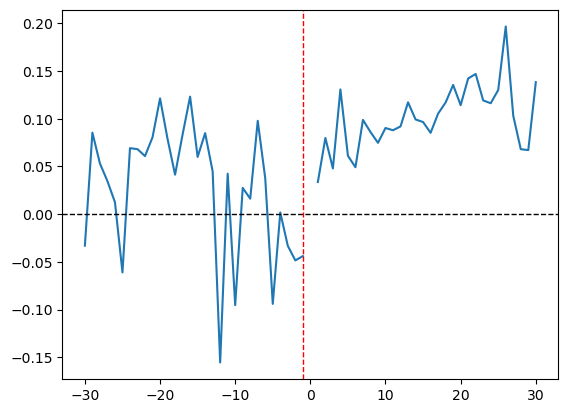

In [46]:
import matplotlib.pyplot as plt
dt = range(-30, 31)
res = list(result.params[1:])
res.insert(30, np.nan)
plt.plot(dt, res)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=-1, color='r', linewidth=1, linestyle='--')

# 컨트롤 그룹과 트리트먼트 그룹의 차이

In [ ]:
# 계수 상관없이 분산 너무 크면 유의미하지 않다.

# 부트스트래핑 기울기를 천 번 기울인다. 기울기가 

# 충분히 유의하려면 분포가 결국 정규분포에 가까워져야 한다.

# 과제

1-1. 묶기 같은 제품 같은 날짜 -> 매출

1-2. 제품 하나도 안 팔린 날짜 0원으로 취급

1-3. FE (date, product)

1-4. control 변수 (고객)

## 1-1. [묶기] 같은제품 같은 날짜 -> 매출

# Test

In [58]:
import statsmodels.api as sm

temp = new_df[new_df["group"] == 1].reset_index(drop = True)

X = temp["post"]
y = temp["NET_PRD_SAL_AMT"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NET_PRD_SAL_AMT   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                 8.921e+04
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:09:24   Log-Likelihood:            -1.5832e+07
No. Observations:             1374733   AIC:                         3.166e+07
Df Residuals:                 1374731   BIC:                         3.166e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.956e+04     51.070    382.934      0.000    1.95e+04    1.97e+04
post        1.669e+04     55.871    298.679      0.000    1.66e+04    1.68e+04
==============================================================================
Omnibus:                  1218327.764   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        131779112.717
Skew:                           3.817   Prob(JB):                         0.00
Kurtosis:                      50.353   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<BarContainer object of 2 artists>

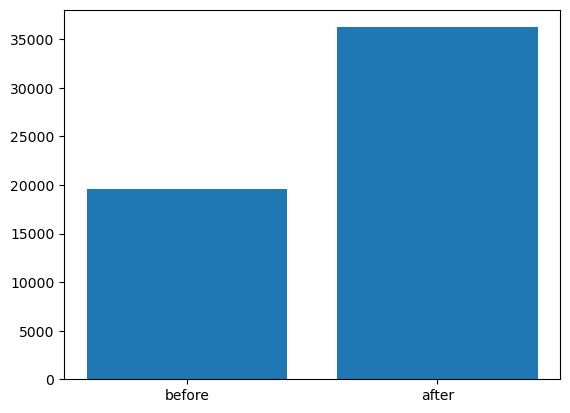

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

before = temp[temp["post"] == 0]["NET_PRD_SAL_AMT"].mean()
after = temp[temp["post"] == 1]["NET_PRD_SAL_AMT"].mean()

plt.bar(["before", "after"],[before, after])

In [60]:
temp

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,group,post
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,1,0
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,1,0
2,111270225,2dca509ce33d24ed822482d581080fe7cef95f88fe9d78...,2018-12-06,17940.0,29900,2021-08-13,2022-08-12,1,0
3,111270188,9b84c671eb8ac9b392b057d8f8a6647120d9b3461e6f65...,2018-12-06,11940.0,19900,2021-07-14,2022-07-13,1,0
4,111270225,ea45f16bb27f22342d043a5cb34014531dc52ac4bdd60a...,2018-12-06,14933.0,29900,2021-08-13,2022-08-12,1,0
...,...,...,...,...,...,...,...,...,...
1374728,111292118,2aaf00ef0558f00afe827da4f2aebaf37dfcfb8ff964ab...,2024-04-23,6930.0,9900,2022-06-24,2023-06-23,1,0
1374729,111292121,190590d657e4380056edc469905f23198470170fb6f79a...,2024-04-23,14240.0,9900,2022-06-24,2023-06-23,1,0
1374730,111040001,f5072bb7791686b4c27607648da30d0404297f4701917f...,2024-04-23,17851.0,24000,2022-03-31,2023-03-30,1,0
1374731,111270641,cefad0f9d01a8872217ccfa330f5e51fdf1104b7b876fe...,2024-04-23,12511.0,21900,2021-07-14,2022-07-13,1,0


ValueError: x and y must have same first dimension, but have shapes (12,) and (32,)

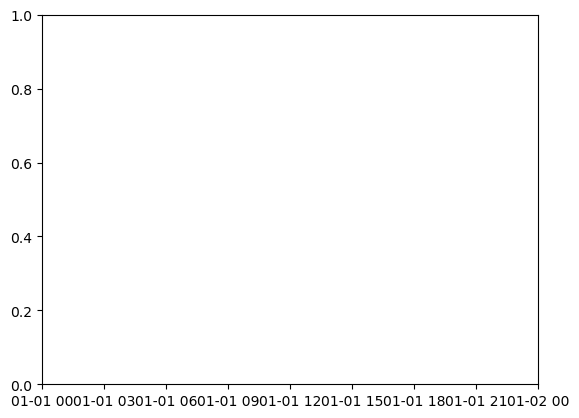

In [61]:
temp = new_df[new_df["PRD_CD"] == "110651228"].loc[938708:952792]
temp["STND_YMD"] = pd.to_datetime(temp["STND_YMD"])
dt = pd.date_range(start = "2021-04-29", end = "2021-05-10")

plt.plot(dt, temp["NET_PRD_SAL_AMT"])
plt.axvline(x=datetime.datetime(2021, 5, 6), color='r', linestyle='--')

In [62]:
import datetime
temp = new_df[new_df["PRD_CD"] == "110651228"].loc[913016:972903]
temp

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,group,post
914412,110651228,bdf03670767df93fead9d4486fff32ee1da4c6319eb452...,2019-06-11,14518.0,15000,2021-05-06,2023-05-05,1,0
914802,110651228,bb3ad1a7271a2d924c05cbc770eabd9c5aec96e67a190d...,2019-06-11,14250.0,15000,2021-05-06,2023-05-05,1,0
914930,110651228,7fe86d2e45bb9e911756fc34b1bfbd8f79b2980fe6d321...,2019-06-11,11400.0,15000,2021-05-06,2023-05-05,1,0
915519,110651228,52240736056d86478840d00806bbd3196406a564b044c3...,2019-06-12,10692.0,15000,2021-05-06,2023-05-05,1,0
916192,110651228,87f9cc2d61fc1f46402a98b624e3cac06f59edb674e3f9...,2019-06-12,15000.0,15000,2021-05-06,2023-05-05,1,0
...,...,...,...,...,...,...,...,...,...
971306,110651228,7ff141df6ef5d56a62ec274f01e6a8d3c2ae176fa2735a...,2019-06-23,15000.0,15000,2021-05-06,2023-05-05,1,0
971609,110651228,14ce6149ece469c25226394c4f63e52a9727ebb7765baa...,2019-06-23,11400.0,15000,2021-05-06,2023-05-05,1,0
972437,110651228,8a7ca91d5cb6c2757b75b1cf6498d8eea35b5d9fa5f931...,2019-06-24,14226.0,15000,2021-05-06,2023-05-05,1,0
972467,110651228,f9ef601da4f389fab9a976c48edc56c83944a964a92c76...,2019-06-24,15000.0,15000,2021-05-06,2023-05-05,1,0


In [63]:
from tqdm import tqdm

target_ids = []

temp = new_df[new_df["group"] == 1]
ids = list(new_df["PRD_CD"].unique())

for i in tqdm(ids):
    t = len(temp[temp["PRD_CD"] == i]["post"].value_counts())
    if t == 2:
        target_ids.append(i)
        
target_ids

 14%|█▎        | 2065/15228 [05:16<33:39,  6.52it/s]  


KeyboardInterrupt: 

In [64]:
result = pd.DataFrame(columns = new_df.columns)
for i in target_ids:
    temp = new_df[new_df["PRD_CD"] == i]
    result = pd.concat([result, temp], axis = 0)

result = result.reset_index(drop = True)
result

C:\Users\amore\AppData\Local\Temp\ipykernel_12560\1685634082.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, temp], axis = 0)


,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,group,post
0,110651228,42793f1ba15b6ec016c82305f6166b13c4b90ee794940d...,2018-12-06,15000.0,15000,2021-05-06,2023-05-05,1,0
1,110651228,7ae26fa167d29cc59193e3bfb0ed31988dd62bee75dd6c...,2018-12-06,30000.0,15000,2021-05-06,2023-05-05,1,0
2,110651228,9ac00a81828a6bca50eca3f6d5286f15872da0df356c74...,2018-12-06,28514.0,15000,2021-05-06,2023-05-05,1,0
3,110651228,d4a36faa06985e0227d9cff3c09b880ffeca25077acce0...,2018-12-09,14250.0,15000,2021-05-06,2023-05-05,1,0
4,110651228,84df6a590e9ddaaa11e93f6ae0e19125fc3b7886ff8119...,2018-12-09,30000.0,15000,2021-05-06,2023-05-05,1,0
...,...,...,...,...,...,...,...,...,...
10921,110651163,f016f5a36596a61d36a11853a4d536a6373e163178062c...,2024-02-19,11937.0,18000,2021-06-23,2023-06-22,1,0
10922,110651163,8847e76691f44379ab8500c1d8e291fa60c023623ecac6...,2024-02-24,11235.0,18000,2021-06-23,2023-06-22,1,0
10923,110651163,fcbf9fcca0b0223a945696517dc4b93c938e57cdbdb77c...,2024-02-28,75668.0,18000,2021-06-23,2023-06-22,1,0
10924,110651163,f5d8ac559603f38f536ea24cf3b15a715a0bc7fdcecb69...,2024-02-29,14040.0,18000,2021-06-23,2023-06-22,1,0


In [65]:
result[(result['group']==1) & (result['post']==0)]

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,group,post
0,110651228,42793f1ba15b6ec016c82305f6166b13c4b90ee794940d...,2018-12-06,15000.0,15000,2021-05-06,2023-05-05,1,0
1,110651228,7ae26fa167d29cc59193e3bfb0ed31988dd62bee75dd6c...,2018-12-06,30000.0,15000,2021-05-06,2023-05-05,1,0
2,110651228,9ac00a81828a6bca50eca3f6d5286f15872da0df356c74...,2018-12-06,28514.0,15000,2021-05-06,2023-05-05,1,0
3,110651228,d4a36faa06985e0227d9cff3c09b880ffeca25077acce0...,2018-12-09,14250.0,15000,2021-05-06,2023-05-05,1,0
4,110651228,84df6a590e9ddaaa11e93f6ae0e19125fc3b7886ff8119...,2018-12-09,30000.0,15000,2021-05-06,2023-05-05,1,0
...,...,...,...,...,...,...,...,...,...
10921,110651163,f016f5a36596a61d36a11853a4d536a6373e163178062c...,2024-02-19,11937.0,18000,2021-06-23,2023-06-22,1,0
10922,110651163,8847e76691f44379ab8500c1d8e291fa60c023623ecac6...,2024-02-24,11235.0,18000,2021-06-23,2023-06-22,1,0
10923,110651163,fcbf9fcca0b0223a945696517dc4b93c938e57cdbdb77c...,2024-02-28,75668.0,18000,2021-06-23,2023-06-22,1,0
10924,110651163,f5d8ac559603f38f536ea24cf3b15a715a0bc7fdcecb69...,2024-02-29,14040.0,18000,2021-06-23,2023-06-22,1,0


In [ ]:
result.to_csv("began_test.csv")

# 추가 작업

[수행과제]

1-1. 묶기 같은 제품 같은 날짜 -> 매출

1-2. 제품 하나도 안 팔린 날짜 0원으로 취급

1-3. FE (date, product)

1-4. control 변수 (고객)